In [1]:
import os
print(os.getcwd())
def update_working_directory():
    from pathlib import Path
    p = Path(os.getcwd()).parents[0]
    os.chdir(p)
    print(p)
update_working_directory()

/Users/admin/Projects/doggo/notebooks
/Users/admin/Projects/doggo


In [19]:
import json
import dill

In [20]:
from src.features.rl_tools import select_best_action
from src.data.env_dog import get_env_actions, env_reset, get_happiness, env_step
from src.utils.plots import get_info_params
from src.visualization.plot_happiness import plot_episode_happiness

In [21]:
# python -m src.models.run_one_episode

# Parametrisation
params = json.loads(open('src/models/run_one_episode.json').read())
print(params)

{'nmax_steps': 2000, 'render_episode': False, 'method': 'sarsa'}


In [22]:
action_dict, n_actions = get_env_actions()

# Variables

if params['method'] == 'Double-Q-Learning':
    with open("models/{}__Q1.pkl".format(params['method']), "rb") as input_file:
        Q1 = dill.load(input_file)
    with open("models/{}__Q2.pkl".format(params['method']), "rb") as input_file:
        Q2 = dill.load(input_file)
else:
    with open("data/interim/{}__Q.pkl".format(params['method']), "rb") as input_file:
        Q = dill.load(input_file)

In [23]:
Q

defaultdict(<function src.features.rl_tools.get_default_Q_values()>,
            {'0.5000_0.0000_0.5000_True': array([1.        , 1.37018399, 1.        , 1.        ]),
             '0.4900_0.0000_0.4900_False': array([1.35754358, 1.        , 1.        , 1.        ]),
             '0.4800_0.0000_0.4800_False': array([1.21299216, 0.96      , 0.99809524, 0.99636364]),
             '0.4700_0.0000_0.4700_False': array([1.18265758, 0.99590909, 0.99794479, 0.955     ]),
             '0.4600_0.0000_0.4600_False': array([1.        , 1.        , 1.06724651, 0.95      ]),
             '0.4500_0.0000_0.4500_False': array([1.32296161, 1.        , 1.        , 1.        ]),
             '0.4400_0.0000_0.4400_False': array([1.17388512, 0.99454545, 0.94      , 1.        ]),
             '0.4300_0.0000_0.4300_False': array([1.        , 1.06543241, 0.935     , 1.        ]),
             '0.4200_0.0000_0.4200_False': array([1.37882042, 1.        , 1.        , 1.        ]),
             '0.4100_0.0000_0.41

In [15]:
# def display_analyse_Q(Q):
import pandas as pd
analyse_Q = pd.DataFrame(columns=[
    'state_id', 'food_id', 'fat_id', 'affection_id', 'action_possible',
    'no_action', 'walking', 'feeding', 'playing',
])

In [16]:
from tqdm import tqdm
for i in tqdm(Q.keys()):
    analyse_Q = analyse_Q.append({
        'state_id': i,
        'food_id': float(i.split('_')[0]),
        'fat_id': float(i.split('_')[1]),
        'affection_id': float(i.split('_')[2]),
        'action_possible': i.split('_')[3],
        'no_action': Q[i][0],
        'walking': Q[i][1],
        'feeding': Q[i][2],
        'playing': Q[i][3]
        }, ignore_index=True)


100%|██████████| 28532/28532 [03:20<00:00, 142.29it/s]


In [32]:
i

('0.5000_0.0000_0.5000_True', 0)

In [17]:
analyse_Q

,state_id,food_id,fat_id,affection_id,action_possible,no_action,walking,feeding,playing
0,0.5000_0.0000_0.5000_True,0.50,0.00,0.50,True,1.000000,1.000000,1.269053,1.000
1,0.4900_0.0000_0.4900_False,0.49,0.00,0.49,False,1.000000,1.102547,1.000000,0.965
2,1.0000_0.2500_0.4800_True,1.00,0.25,0.48,True,1.390416,1.000000,1.000000,1.000
3,0.9900_0.2500_0.4700_True,0.99,0.25,0.47,True,1.000000,1.000000,1.236772,1.000
4,0.9800_0.2500_0.4600_False,0.98,0.25,0.46,False,1.000000,1.062252,1.000000,0.950
...,...,...,...,...,...,...,...,...,...
28527,0.8700_0.9100_0.5700_True,0.87,0.91,0.57,True,1.000000,1.000000,1.000000,1.000
28528,0.8200_0.8100_0.6200_True,0.82,0.81,0.62,True,1.000000,1.000000,1.000000,1.000
28529,0.8100_0.8100_0.6100_True,0.81,0.81,0.61,True,1.000000,1.000000,1.000000,1.000
28530,0.2600_0.8800_0.0300_True,0.26,0.88,0.03,True,1.000000,1.000000,1.000000,1.000


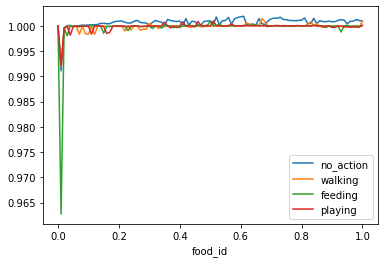

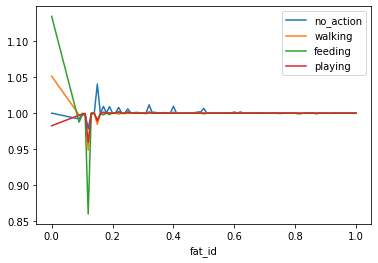

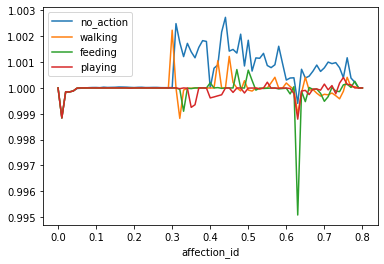

In [18]:
analyse_Q.groupby('food_id').agg({
    'no_action': 'mean',
    'walking': 'mean',
    'feeding': 'mean',
    'playing': 'mean'
}).plot()

analyse_Q.groupby('fat_id').agg({
    'no_action': 'mean',
    'walking': 'mean',
    'feeding': 'mean',
    'playing': 'mean'
}).plot()

analyse_Q.groupby('affection_id').agg({
    'no_action': 'mean',
    'walking': 'mean',
    'feeding': 'mean',
    'playing': 'mean'
}).plot()